<a href="https://colab.research.google.com/github/haritmm97/ML-Projects-Portfolio/blob/master/Capstone_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Define the problem, propose solution:**

**Problem Statement:**

In the current situation, we find it difficult to predict the correct house prices. Generally, people consider the location of the house and the square foot area of the house to come up with the prices which might be inappropriate as there are lot other factors that needs to be considered when coming up with the prices. Without having much idea on factors contributing to the prices, people tend to compare the house prices in same locality to come up with the estimation price which could either too high or too low which in turn doesn’t satisfy the buyer/seller. This exercise of comparison also causes some manual effort to be spent at times which goes useless due to inaccuracies.

**Areas of improvement/Solution:**

We see a solution for getting in the features/details which are contributing to house prices using a machine learning based system which can learn using the past history of data. Also, the machine learning system can help in automating the house-based comparison process much faster than the manual work that is being done currently which would eliminate the manual task/effort spent on this. This system would help in predicting the appropriate house prices with higher accuracy compared to current system

**Findings on the data:**

We have looked into the data shared which contains various factors of houses like different housing types like 2BHK,3BHK, different floors, different square foot areas, amenities like coast & sight view, condition & quality of houses captured from different locations with prices associated to that as required.

**2.EDA and Pre-processing**

In this section,we will perform the Exploratory data analysis like checking for null value,checking & treating outliers and removing unwanted variables.We will also analyze the relationship & distribution of indepedent and target variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import Image
from graphviz import Source
from sklearn import tree
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#read data from csv using dataframe
dfdata = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/Capstone/innercity.csv")
dfdata.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
#Get the shape of the dataset
shape=dfdata.shape
print('shape of data :',shape)

shape of data : (21613, 23)


In [5]:
#datatype of each column of given data
datType=dfdata.dtypes
print('datatype of each col:\n',datType)

datatype of each col:
 cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object


In [6]:
#converting the dayhours to get the year and month on which it was sold
dfdata['dayhours']=dfdata['dayhours'].astype('datetime64[ns]')
dfdata['soldyr']=pd.DatetimeIndex(dfdata['dayhours']).year
dfdata['soldmonth']=pd.DatetimeIndex(dfdata['dayhours']).month
dfdata.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,11
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,12
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,4
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,5
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,4


From the above dataset,dropping off the column day hours as we have extracted the month & year from that and added a seperate column

In [7]:
#dropping dayhours column
house_data=dfdata.drop('dayhours',axis=1)
house_data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04,2014.322954,6.574423
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06,2015.000000,12.000000


**checking for presence of missing value**

In [8]:
missing_values=house_data.isnull()
print('Missing values count in datatable:\n',missing_values.sum())

Missing values count in datatable:
 cid                 0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
soldyr              0
soldmonth           0
dtype: int64


In [9]:
#five point summary
quartiles=house_data.describe(percentiles=[.25,.50,.75])
print('five point summary:\n',quartiles)

five point summary:
                 cid         price  ...        soldyr     soldmonth
count  2.161300e+04  2.161300e+04  ...  21613.000000  21613.000000
mean   4.580302e+09  5.401822e+05  ...   2014.322954      6.574423
std    2.876566e+09  3.673622e+05  ...      0.467616      3.115308
min    1.000102e+06  7.500000e+04  ...   2014.000000      1.000000
25%    2.123049e+09  3.219500e+05  ...   2014.000000      4.000000
50%    3.904930e+09  4.500000e+05  ...   2014.000000      6.000000
75%    7.308900e+09  6.450000e+05  ...   2015.000000      9.000000
max    9.900000e+09  7.700000e+06  ...   2015.000000     12.000000

[8 rows x 24 columns]


From the above,five point summary analysis,we see the most of indepedent variables are skewed.This might be due to outliers.The skewness affects the model performance adversely and hence the skewness of the data needs to be correct.For we first check for outliers & treat the outliers

Also,we see that yr_renovated seems to be 0 in most of the case eventhough there was a difference between living measure,lot measure compared to living measure15 & lot measure 15 which doesnt make sense to the dataset.Hence we can remove this column.

We can add a column to flag renovated as 1 and 0 based on difference in the area

In [10]:
#Removing yr_renovated column
house_dat=house_data.drop('yr_renovated',axis=1)
#Adding a column to flag the renovation
house_dat['renovated']=0
house_dat['renovated'].loc[((house_dat['living_measure']<house_dat['living_measure15'])|(house_dat['living_measure']>house_dat['living_measure15'])|(house_dat['lot_measure']<house_dat['lot_measure15'])|(house_dat['lot_measure']>house_dat['lot_measure15']))]=1
house_dat.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth,renovated
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,2120,7553,1,16477,2014,11,1
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,98023,47.3165,-122.386,2260,8800,0,10050,2014,12,1
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,98038,47.3515,-121.999,2370,4348,0,6694,2015,4,1
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,1520,3844,0,4664,2014,5,1
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,98115,47.6768,-122.269,1900,5940,0,5450,2015,4,1


Since we had a new column "renovation" to indicate whether the house was renovated or not.We can drop off living measure15 and lot measure15 columns

In [11]:
#Removing living_measure 15 and lot_measure15 columns
house_dat1=house_dat.drop(['living_measure15','lot_measure15'],axis=1)
house_dat1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,1,16477,2014,11,1
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,98023,47.3165,-122.386,0,10050,2014,12,1
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,98038,47.3515,-121.999,0,6694,2015,4,1
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,0,4664,2014,5,1
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,98115,47.6768,-122.269,0,5450,2015,4,1


Checking for outlier

In [12]:
#checking outlier using IQR
Q1=house_dat1.quantile(0.25)
Q3=house_dat1.quantile(0.75)
IQR=Q3-Q1
low_value  = Q1-1.5*IQR
high_value = Q3+1.5*IQR
print(low_value,high_value)
dfnonoutlier=(house_dat1>low_value) & (house_dat1<high_value)
print('Non outlier count in datatable:\n',dfnonoutlier.sum())

cid              -5.655728e+09
price            -1.626250e+05
room_bed          1.500000e+00
room_bath         6.250000e-01
living_measure   -2.575000e+02
lot_measure      -3.432000e+03
ceil             -5.000000e-01
coast             0.000000e+00
sight             0.000000e+00
condition         1.500000e+00
quality           5.500000e+00
ceil_measure     -3.400000e+02
basement         -8.400000e+02
yr_built          1.882000e+03
zipcode           9.790550e+04
lat               4.716050e+01
long             -1.226325e+02
furnished         0.000000e+00
total_area       -1.912500e+03
soldyr            2.012500e+03
soldmonth        -3.500000e+00
renovated         1.000000e+00
dtype: float64 cid               1.508768e+10
price             1.129575e+06
room_bed          5.500000e+00
room_bath         3.625000e+00
living_measure    4.234500e+03
lot_measure       1.916000e+04
ceil              3.500000e+00
coast             0.000000e+00
sight             0.000000e+00
condition         5.5000

From the above analysis,we see outliers in the most of the independent variables.We can ignore coast,sight,furnished,renovation for outlier treatment as these hold binary value For the other continuous variable like room_bed,room_bath,living_measure,lot_measure,ceil,condition,quality,ceil_measure,basement,total_area ,we would treat outliers with the 10% and 90% quantiles

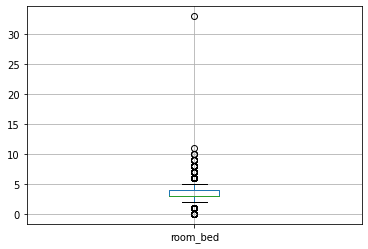

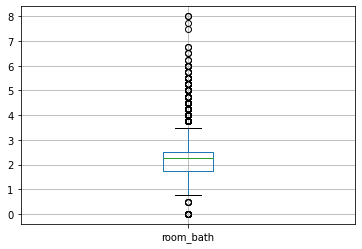

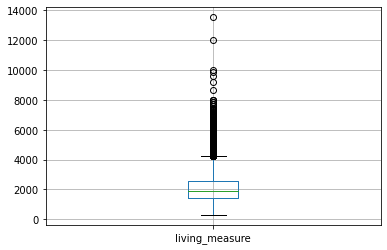

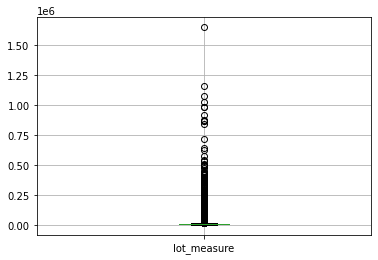

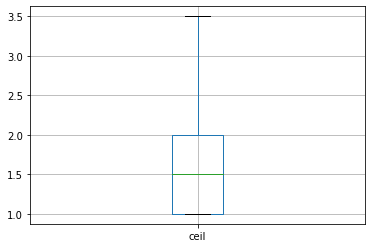

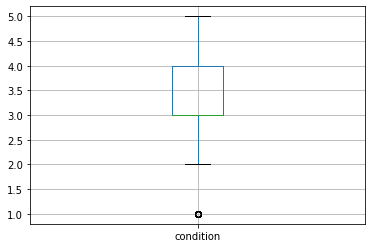

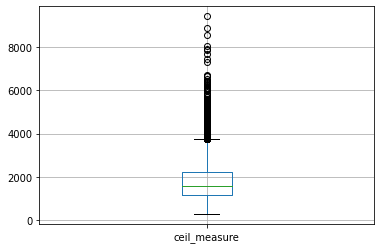

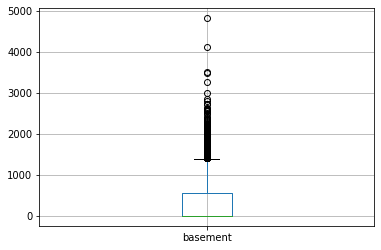

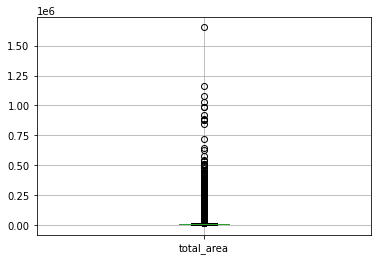

In [13]:
#Box plot to visualise outlier
house_dat1.boxplot('room_bed')
plt.show()
house_dat1.boxplot('room_bath')
plt.show()
house_dat1.boxplot('living_measure')
plt.show()
house_dat1.boxplot('lot_measure')
plt.show()
house_dat1.boxplot('ceil')
plt.show()
house_dat1.boxplot('condition')
plt.show()
house_dat1.boxplot('ceil_measure')
plt.show()
house_dat1.boxplot('basement')
plt.show()
house_dat1.boxplot('total_area')
plt.show()

In [14]:
#calculating 10% & 90% quantile
lowerquantile=house_dat1.quantile(0.10)
upperquantile=house_dat1.quantile(0.90)
print(lowerquantile,upperquantile)

cid               1.036000e+09
price             2.450000e+05
room_bed          2.000000e+00
room_bath         1.000000e+00
living_measure    1.090000e+03
lot_measure       3.322200e+03
ceil              1.000000e+00
coast             0.000000e+00
sight             0.000000e+00
condition         3.000000e+00
quality           6.000000e+00
ceil_measure      9.700000e+02
basement          0.000000e+00
yr_built          1.926000e+03
zipcode           9.800800e+04
lat               4.735030e+01
long             -1.223720e+02
furnished         0.000000e+00
total_area        4.941200e+03
soldyr            2.014000e+03
soldmonth         2.000000e+00
renovated         1.000000e+00
Name: 0.1, dtype: float64 cid               8.732028e+09
price             8.870000e+05
room_bed          4.000000e+00
room_bath         3.000000e+00
living_measure    3.250000e+03
lot_measure       2.139760e+04
ceil              2.000000e+00
coast             0.000000e+00
sight             0.000000e+00
condition    

In [15]:
# treating outliers by replacing lower outlier with  quartile 10% and higher outlier with quartile 90%
house_dat1['room_bed'].loc[(house_dat1['room_bed']<1.500000e+00)]=2.000000e+00
house_dat1['room_bed'].loc[(house_data['room_bed']>5.500000e+00)]= 4.000000e+00
house_dat1['room_bath'].loc[(house_data['room_bath']<6.250000e-01)]=1.000000e+00
house_dat1['room_bath'].loc[(house_data['room_bath']>3.625000e+00)]=3.000000e+00
house_dat1['living_measure'].loc[(house_data['living_measure']<-2.575000e+02)]=1.090000e+03
house_dat1['living_measure'].loc[(house_data['living_measure']>4.234500e+03)]=3.250000e+03
house_dat1['lot_measure'].loc[(house_data['lot_measure']<-3.432000e+03)]=3.322200e+03
house_dat1['lot_measure'].loc[(house_data['lot_measure']>1.916000e+04)]=2.139760e+04
house_dat1['ceil'].loc[(house_data['ceil']<-5.000000e-01)]=1.000000e+00
house_dat1['ceil'].loc[(house_data['ceil']>3.500000e+00)]=2.000000e+00
house_dat1['condition'].loc[(house_data['condition']<1.500000e+00)]=3.000000e+00
house_dat1['condition'].loc[(house_data['condition']>5.500000e+00)]=4.000000e+00
house_dat1['quality'].loc[(house_data['quality']<5.500000e+00)]= 6.000000e+00
house_dat1['quality'].loc[(house_data['quality']>9.500000e+00)]=9.000000e+00
house_dat1['ceil_measure'].loc[(house_data['ceil_measure']<-3.400000e+02)]=9.700000e+02
house_dat1['ceil_measure'].loc[(house_data['ceil_measure']>3.740000e+03)]=2.950000e+03
house_dat1['basement'].loc[(house_data['basement']<-8.400000e+02)]=0.000000e+00
house_dat1['basement'].loc[(house_data['basement']>1.400000e+03)]=9.700000e+02
house_dat1['long'].loc[(house_data['long']<-1.226325e+02)]=-1.223870e+02
house_dat1['long'].loc[(house_data['long']>-1.218205e+02)]=-1.219790e+02
house_dat1['total_area'].loc[(house_data['total_area']<-1.912500e+03)]=4.941200e+03
house_dat1['total_area'].loc[(house_data['total_area']>2.194750e+04)]=2.408880e+04

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


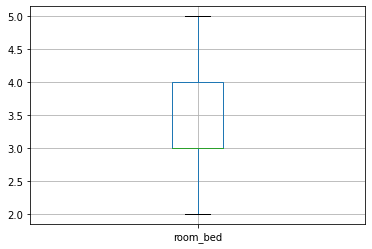

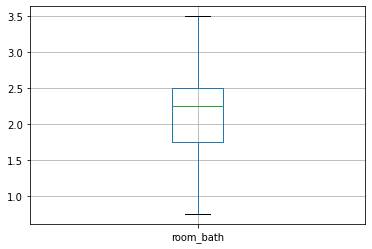

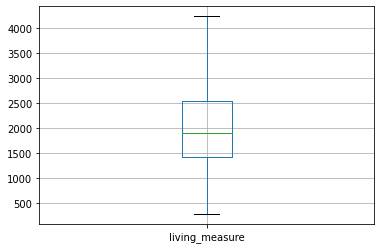

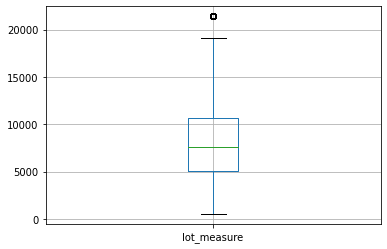

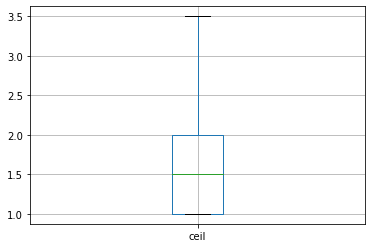

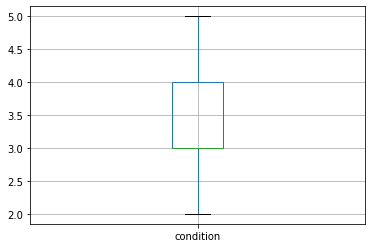

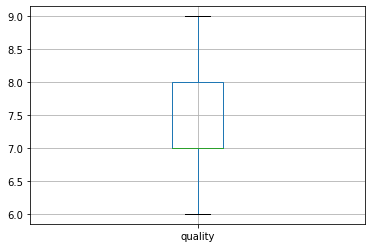

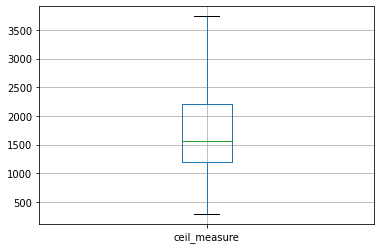

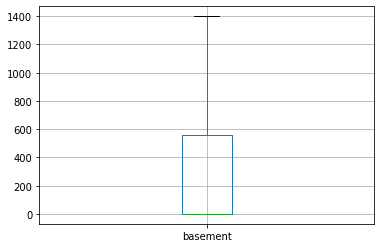

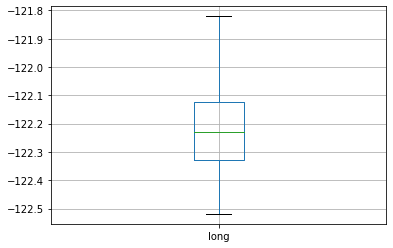

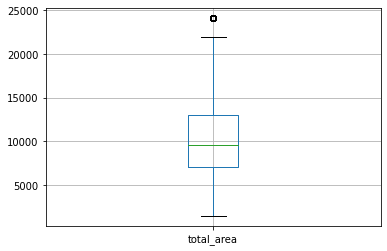

In [16]:
#Box plot to validate after removal of outlier
house_dat1.boxplot('room_bed')
plt.show()
house_dat1.boxplot('room_bath')
plt.show()
house_dat1.boxplot('living_measure')
plt.show()
house_dat1.boxplot('lot_measure')
plt.show()
house_dat1.boxplot('ceil')
plt.show()
house_dat1.boxplot('condition')
plt.show()
house_dat1.boxplot('quality')
plt.show()
house_dat1.boxplot('ceil_measure')
plt.show()
house_dat1.boxplot('basement')
plt.show()
house_dat1.boxplot('long')
plt.show()
house_dat1.boxplot('total_area')
plt.show()

In [17]:
#Identify unique values in each column
print('unique values in cid:',house_dat1['cid'].unique().size)
print('unique values in zipcode:',house_dat1['zipcode'].unique().size)

unique values in cid: 21436
unique values in zipcode: 70


In [0]:
#removing the cid column as it doesnt conribute to price
house_dat2=house_dat1.drop(['cid'],axis=1)

Label encoding for zip code

In [19]:
#converting the categorical variables cid & zipcode to numerical values using label encoder
preprocess=preprocessing.LabelEncoder()
#house_dat2['cid']=preprocess.fit_transform(house_dat2.loc[:,'cid'])
house_dat2['zipcode']=preprocess.fit_transform(house_dat2.loc[:,'zipcode'])
house_dat2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated
0,808100,4.0,3.25,3020.0,13457.0,1.0,0,0,5.0,9.0,3020.0,0.0,1956,57,47.7174,-122.336,1,16477.0,2014,11,1
1,277500,4.0,2.50,2550.0,7500.0,1.0,0,0,3.0,8.0,1750.0,800.0,1976,13,47.3165,-122.386,0,10050.0,2014,12,1
2,404000,3.0,2.50,2370.0,4324.0,2.0,0,0,3.0,8.0,2370.0,0.0,2006,23,47.3515,-121.999,0,6694.0,2015,4,1
3,300000,2.0,1.00,820.0,3844.0,1.0,0,0,4.0,6.0,820.0,0.0,1916,57,47.7049,-122.349,0,4664.0,2014,5,1
4,699000,2.0,1.50,1400.0,4050.0,1.0,0,0,4.0,8.0,1400.0,0.0,1954,49,47.6768,-122.269,0,5450.0,2015,4,1


Feature scaling using z score

In [0]:
#scaling
from scipy.stats import zscore
housedat_scaled = house_dat2.loc[:,'price':'renovated']
housedat_scaled_z = housedat_scaled.apply(zscore)

**Studying relationship of target/other variable in the given data set using pair plot**

In [0]:
#sns.pairplot(housedat_scaled_z,diag_kind = 'kde')
#plt.show

Inference from the above plot:
Price seems to have linearity relationship with room_bed,room_bath,living measure,quality,ceil measure but doesnt have any linearity with other attributes and price is highly distributed in the range of 1000000 - 2000000

In [0]:
from sklearn.model_selection import train_test_split
X=housedat_scaled_z.drop('price',axis=1) #Indepedent feature columns
y=housedat_scaled_z['price'] # dependent feature column
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**3.Model building**

In the below section,we will evaluate the performance of the different models on the dataset.We will analyse the score of each model and find the best fit regressor for this pricing model

**Linear Regression model**

In [0]:
from sklearn.linear_model import LinearRegression
#fit the model on training data
linmodel= LinearRegression()
linmodel.fit(x_train,y_train)
#predict using test
y_predict=linmodel.predict(x_test)
#predict using training data
y_predict_trn=linmodel.predict(x_train)

In [24]:
#linear regression model score
model_score_trn=linmodel.score(x_train,y_train)
print("Linear regresion model score using training data:",model_score_trn)
model_score=linmodel.score(x_test,y_test)
print("Linear regresion model score using test data:",model_score)

Linear regresion model score using training data: 0.6215636855741313
Linear regresion model score using test data: 0.6033359781150031


In [0]:
#RMSE of linear regression model
from sklearn.metrics import mean_squared_error 
RMSE_lin=np.sqrt(mean_squared_error(y_test,y_predict))

In [0]:
#creating a dataframe to track the performance of each model
data={'Model':[],'Traindata_score':[],'Testdata_score':[],'RMSE':[]}
Perf_metric=pd.DataFrame(data)
Perf_metric.loc[0]=['Linear regression',model_score_trn,model_score,RMSE_lin]

**Polynomial Regression model**

In [0]:
#since not all other independent variables are linear with the target(pricing)>we apply polynomial features as data is non linear
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
polymodel = PolynomialFeatures(degree=2,interaction_only=True)
poly_x_train = polymodel.fit_transform(x_train)
poly_x_test = polymodel.fit_transform(x_test)
linear_polymodel = linear_model.LinearRegression()
linear_polymodel.fit(poly_x_train,y_train)
#predict using test
poly_y_predict=linear_polymodel.predict(poly_x_test)
#predict using training data
poly_y_predict_trn=linear_polymodel.predict(poly_x_train)

In [28]:
#polynomial regression model score
model_score_polytrn=linear_polymodel.score(poly_x_train,y_train)
print("Polynomial regresion model score using training data:",model_score_polytrn)
model_score_poly=linear_polymodel.score(poly_x_test,y_test)
print("Polynomial regresion model score using test data:",model_score_poly)

Polynomial regresion model score using training data: 0.7393747762923484
Polynomial regresion model score using test data: 0.688009924829305


In [0]:
#RMSE of polynomial regression model
rmse_poly=np.sqrt(mean_squared_error(y_test,poly_y_predict))
Perf_metric.loc[1]=['Polynomial regression',model_score_polytrn,model_score_poly,rmse_poly]

**K- Nearest Neighbor regression model**

In [0]:
##KNN regressor model
from sklearn.neighbors import KNeighborsRegressor
#fit the model on training data
knnmodel=KNeighborsRegressor(n_neighbors=5)
knnmodel.fit(x_train,y_train)
#predict using training data
y_predict_knn_trn=knnmodel.predict(x_train)
#predict using test
y_predict_knn=knnmodel.predict(x_test)

In [31]:
#K-NN model model score
knnmodel_score_trn=knnmodel.score(x_train,y_train)
print("K-NN model score using training data:",knnmodel_score_trn)
knnmodel_score=knnmodel.score(x_test,y_test)
print("K-NN model score using test data:",knnmodel_score)

K-NN model score using training data: 0.8222965239167643
K-NN model score using test data: 0.6775933577252405


In [0]:
#RMSE of KNN regression model
rmse_knn=np.sqrt(mean_squared_error(y_test,y_predict_knn))
Perf_metric.loc[2]=['KNN regression',knnmodel_score_trn,knnmodel_score,rmse_knn]

**Decision Tree**

In [33]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dTree=DecisionTreeRegressor(criterion='mse',random_state=1)
dTree.fit(x_train,y_train)
#predict using test data
y_predict_dtree=dTree.predict(x_test)
#decision tree score
print("Decision Tree score for training dataset:",dTree.score(x_train,y_train))
print("Decision Tree score for test dataset:",dTree.score(x_test,y_test))

Decision Tree score for training dataset: 0.9999999741183707
Decision Tree score for test dataset: 0.6672998278127034


In [0]:
#RMSE of dtree regression model
rmse_dtree=np.sqrt(mean_squared_error(y_test,y_predict_dtree))
Perf_metric.loc[4]=['Decision tree',dTree.score(x_train,y_train),dTree.score(x_test,y_test),rmse_dtree]

**Feature selection based on feature importance**

In [35]:
# Get feature importance
feature_importances = dTree.feature_importances_
print (pd.DataFrame(feature_importances, columns = ["Imp"], index = x_train.columns))

                     Imp
room_bed        0.005024
room_bath       0.006220
living_measure  0.180473
lot_measure     0.016479
ceil            0.002737
coast           0.067229
sight           0.007920
condition       0.002935
quality         0.007602
ceil_measure    0.016980
basement        0.010705
yr_built        0.037301
zipcode         0.029743
lat             0.176621
long            0.076274
furnished       0.324014
total_area      0.015780
soldyr          0.004090
soldmonth       0.011734
renovated       0.000140


From the above analysis on feature importance,we see that renovated,soldyr,ceil are of least important.Hence we will evaluate the performance by dropping these column

**Decision tree regressor after feature selection**

In [37]:
#Dropping renovated,soldyr,ceil and predicting using decision tree
X2 = housedat_scaled_z.drop(['price','renovated','soldyr','ceil'],axis=1) 
y2 = housedat_scaled_z['price']
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=1)
dTree.fit(x2_train,y2_train)
#predict using test data
y2_predict_dtree=dTree.predict(x2_test)
#predict using train data
y2_predict_dtree_train=dTree.predict(x2_train)
#decision tree score
print("Decision Tree score for training dataset:",dTree.score(x2_train,y2_train))
print("Decision Tree score for test dataset:",dTree.score(x2_test,y2_test))

Decision Tree score for training dataset: 0.9999999740934852
Decision Tree score for test dataset: 0.6926248798634176


In [0]:
#RMSE of dtree after feature selection model
rmse_dtree_fs=np.sqrt(mean_squared_error(y2_test,y2_predict_dtree))
Perf_metric.loc[5]=['Decisiontree_featuresel',dTree.score(x2_train,y2_train),dTree.score(x2_test,y2_test),rmse_dtree_fs]

**Ensemble Techniques**

In below selection,we evaluate by applying different ensemble techniques like bagging,boosting & random forest to improve the performance of model.

From the base model analysis,decision tree seems to perform well compared to other models and hence we apply ensemble technique on top of decision tree

**Applying bagging on top of decision tree**

In [40]:
#Bagging
from sklearn.ensemble import BaggingRegressor
bgc=BaggingRegressor(base_estimator=dTree,n_estimators=10,random_state=1)
bgc.fit(x2_train,y2_train)
#predict using test data
bgc_predict=bgc.predict(x2_test)
#accuracy score
print("Bagging regressor score for test dataset:",bgc.score(x2_test,y2_test))
print("Bagging regressor score for training dataset:",bgc.score(x2_train,y2_train))

Bagging regressor score for test dataset: 0.8255229631693326
Bagging regressor score for training dataset: 0.9734253711697305


In [41]:
#RMSE of bagging regression model
rmse_bagging=np.sqrt(mean_squared_error(y2_test,bgc_predict))
Perf_metric.loc[6]=['Bagging_DecTree',bgc.score(x2_train,y2_train),bgc.score(x2_test,y2_test),rmse_bagging]
Perf_metric

,Model,Traindata_score,Testdata_score,RMSE
0,Linear regression,0.621564,0.603336,0.628937
1,Polynomial regression,0.739375,0.688010,0.557784
2,KNN regression,0.822297,0.677593,0.567020
4,Decision tree,1.000000,0.667300,0.576000
5,Decisiontree_featuresel,1.000000,0.692625,0.553644
6,Bagging_DecTree,0.973425,0.825523,0.417124


**Applying Adaboost on top of decision tree**

In [42]:
#AdaBoosting
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(base_estimator=dTree,n_estimators=10,random_state=1)
abc.fit(x2_train,y2_train)
#predict using test data
abc_predict=abc.predict(x2_test)
#accuracy score
print("Adaboost regressor score for test dataset:",abc.score(x2_test,y2_test))
print("Adaboost regressor score for training dataset:",abc.score(x2_train,y2_train))

Adaboost regressor score for test dataset: 0.8114783311119443
Adaboost regressor score for training dataset: 0.9987487988980341


In [0]:
#RMSE of boosting regression model
rmse_boosting=np.sqrt(mean_squared_error(y2_test,abc_predict))
Perf_metric.loc[7]=['Boosting_DecTree',abc.score(x2_train,y2_train),abc.score(x2_test,y2_test),rmse_boosting]

**Applying GradientBoost on top of decision tree**

In [44]:
#GradientBoost
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(init=dTree,n_estimators=10,random_state=1)
gbc.fit(x2_train,y2_train)
#predict using test data
gbc_predict=gbc.predict(x2_test)
#accuracy score
print("GradientBoost regressor score for test dataset:",gbc.score(x2_test,y2_test))
print("GradientBoost regressor score for training dataset:",gbc.score(x2_train,y2_train))

GradientBoost regressor score for test dataset: 0.6926248798634176
GradientBoost regressor score for training dataset: 0.9999999740934852


In [0]:
#RMSE of gradient boosting regression model
rmse_gradboosting=np.sqrt(mean_squared_error(y2_test,gbc_predict))
Perf_metric.loc[8]=['GradBoosting_DecTree',gbc.score(x2_train,y2_train),gbc.score(x2_test,y2_test),rmse_gradboosting]

**Applying random forest regressor on top of decision tree**

In [46]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=50,random_state=1,max_features=17)
rfc.fit(x2_train,y2_train)
#predict using test data
rfc_predict=rfc.predict(x2_test)
#accuracy score
print("RandomForest regressor score for test dataset:",rfc.score(x2_test,y2_test))
print("RandomForest regressor score for training dataset:",rfc.score(x2_train,y2_train))

RandomForest regressor score for test dataset: 0.8413092680728002
RandomForest regressor score for training dataset: 0.9801717401898339


In [0]:
#RMSE of random forest regression model
rmse_ranforest=np.sqrt(mean_squared_error(y2_test,rfc_predict))
Perf_metric.loc[9]=['RandomForest_DecTree',rfc.score(x2_train,y2_train),rfc.score(x2_test,y2_test),rmse_ranforest]

**Inference on Performance of the models**

In [48]:
Perf_metric

,Model,Traindata_score,Testdata_score,RMSE
0,Linear regression,0.621564,0.603336,0.628937
1,Polynomial regression,0.739375,0.688010,0.557784
2,KNN regression,0.822297,0.677593,0.567020
4,Decision tree,1.000000,0.667300,0.576000
5,Decisiontree_featuresel,1.000000,0.692625,0.553644
6,Bagging_DecTree,0.973425,0.825523,0.417124
7,Boosting_DecTree,0.998749,0.811478,0.433587
8,GradBoosting_DecTree,1.000000,0.692625,0.553644
9,RandomForest_DecTree,0.980172,0.841309,0.397806
